Microsoft New movie studio Analysis


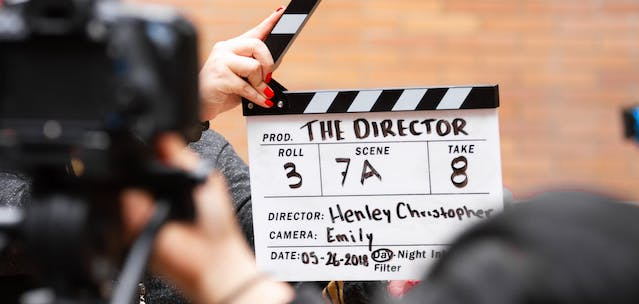

Please fill out:

Student name: Stephanie Mwai

Student pace: part time

Scheduled project review date/time: 05/11/2023 Midnight

Instructor name: Moringa School

Blog post URL:


Overview

Microsoft has decided to create a new movie studio. They have hired me to help them better understand the movie industry and make sound decisions based on Analysis and Science.

To get started, I was given 11 sets of data obtained from the following sources:

*   Box Office Mojo


*   IMDB


*   Rotten Tomatoes
*   TheMovieDB

*   The Numbers


I was assigned with the following tasks:

  Explore the given data and/or find complementary data

  Obtain meaningful, actionable insights from it that will

  Help the new head of the studio decide what type of films to create

Business Problem

The problem statement stated is that Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Here I was able to come with three questions that led me to my objectives which included:



*   What type of films are currently being produced? which led me directly to the 'Genres'
*   What is the budget/income used to produce movies?


*   What category/genre of movies is being produced the most in the movie industry?




Data Understanding

I decided to use three data files to analyse my data that is:


*   bom.movies.gross
*   imdb.title.ratings


*   imdb.title.basics

The above guided me in carrying out my objectives which included:



*   Creating a bar graph for the genres of movies produced
*   Creating a pie chart illustrating the percentages of the genres of movies produced

*   Creating a line plot for foreign gross income showing the trend over time
*   Creating a line plot for the domestic gross income showing the trend overt time

Box Office Movie Data

Import the relevant libraries needed for the data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load my data in a structure that I can easily use

I load my data using Pandas which is appropriate to use in the analysis of my dataframe.

In [ ]:
bom_movies_gross = pd.read_csv('bom.movie_gross.csv.gz')


Explore my data in order to ensure that the loading of my data is appropriate for analysis

In [ ]:
# visually check the first five rows of the data
bom_movies_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
#visually check the last five rows of the data
bom_movies_gross.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [ ]:
#check for the number of rows and columns of the data
bom_movies_gross.shape

(3387, 5)

In [ ]:
#check for the title of each of the column names
bom_movies_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
#review sample for the data
bom_movies_gross.sample(5)

,title,studio,domestic_gross,foreign_gross,year
903,Hyde Park on Hudson,Focus,6400000.0,2500000,2012
2515,Genius,RAtt.,1400000.0,4300000,2016
711,I'm Glad My Mother is Alive,Strand,8700.0,13200,2011
36,Eat Pray Love,Sony,80600000.0,124000000,2010
1694,The German Doctor,Gold.,418000.0,2600000,2014


In [ ]:
#check the overview of the data provided
bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the above observation, we can very well see that we have 3387 entries. I can also identify that the columns represented above that is (studio, domestic_gross, foreign_gross) have some missing values. Another interesting observation is that the foreign_gross column is represent by the dtype object instead of dtype float as it is in numbers form.

In [ ]:
#check for a statistical summary of the data
bom_movies_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Data Preprocessing and Cleaning

In this case I will remove any irrelevant data provided which includes any data that is incorrect, incomplete, corrupted or duplicated. I will also check for any missing data.

In [ ]:
#first we remove "," from the two columns that is domestic_gross and foreign_gross. This way we avoid them being read as strings
bom_movies_gross['domestic_gross'].replace(",", "", inplace=True, regex=True)
bom_movies_gross['foreign_gross'].replace(",", "", inplace=True, regex=True)

In [ ]:
#as observed earlier the foreign_gross column data type was object instead of float therefore we change data type to a float type
bom_movies_gross['foreign_gross']= bom_movies_gross['foreign_gross'].astype('float')
bom_movies_gross['year']= bom_movies_gross['year'].astype('str')
bom_movies_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year               object
dtype: object

In [ ]:
#find the sum of the missing values
bom_movies_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
#check for the percentage of the missing values in the data
total_data = bom_movies_gross.shape[0]
#the percentage of each of the missing values is calculated by dividing the sum of each column by the length of the data
percentage_missing_values = bom_movies_gross.isna().sum()/total_data *100
#create a dataframe for the above data assigning it to missing_value_df
missing_values_df = pd.DataFrame({
    'missing values': bom_movies_gross.isna().sum(),
    'percentage missing values' : percentage_missing_values
})
missing_values_df


,missing values,percentage missing values
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


As observed above the domestic_gross column and the foreign_gross have (0.82%) and (39.85%) of their missing values respectively. Therefore, I do not think that this will affect my analysis in any way. According to my observation, I am assuming that the two columns of the domestic_gross and foreign_gross represents income earned for each movie produced and the value of missing values of the domestic_gross represents the zero income earned therefore, we will replace the balance with np.nan (zero). Additionally, for the foreign_gross column which is represented by (39.85%) we will relace with the mean of the data.

In [ ]:
#fill in the missing values of the foreign_gross and domestic_gross column with '0'
#afterward we will check the value of the missing values
bom_movies_gross['domestic_gross'].replace(np.nan, 0, inplace=True, regex=False)
bom_movies_gross['foreign_gross'].fillna(bom_movies_gross['foreign_gross'].mean(), inplace=True)
bom_movies_gross.isna().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
#drop the rows of the studio missing names
#we will drop using the subset and the axis = 0 to drop the rows in the data
bom_movies_gross.dropna(axis = 0, subset=['studio'], inplace=True)
bom_movies_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Check for Duplicates

In [ ]:
#we will check and count for any duplicates that may be there in the data
duplicated_rows = bom_movies_gross.duplicated().sum()
duplicated_rows

0

From the observation above we can clearly see that there are no duplicates.

Check for any unwanted observations

Check for any Outliers

As we can see the data above has numeric data. Therefore I want to check for any extreme data points that may be there. This can easily be done by using boxplot which are easy to use when visualising outliers or using the Interquartile range.

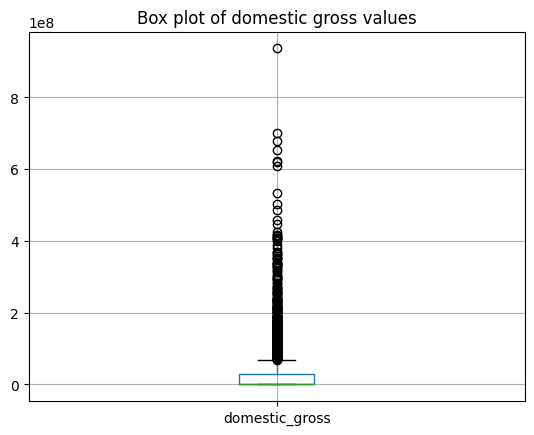

In [ ]:
#use visualization for
plt.figure()
ax=bom_movies_gross.boxplot(column = 'domestic_gross')
ax.set_title('Box plot of domestic gross values')
plt.suptitle('')
plt.show()
#numeric_columns = ['domestic_gross', 'foreign_gross']
#bom_movies_gross.boxplot(column = numeric_columns)

From the observation made above we can see the foreign_gross and domestic_gross outliers

In [ ]:
#remove the outliers
#I create a function to remove the outliers observed
def remove_outliers_movies(bom_movies_gross,column):
    Q1 = bom_movies_gross[column].quantile(0.25)
    Q3 = bom_movies_gross[column].quantile(0.75)
    IQR = Q3-Q1
    bom_movies_gross= bom_movies_gross[~((bom_movies_gross[column]<(Q1-1.5*IQR)) | (bom_movies_gross[column]>(Q3+1.5*IQR)))]
    return bom_movies_gross
#my interest is to remove outliers from the two columns foreign_gross and domestic_gross
numeric_columns = ['domestic_gross', 'foreign_gross']
for column in numeric_columns:
    filtered_bom_movies_gross = remove_outliers_movies(bom_movies_gross,column)



<Axes: >

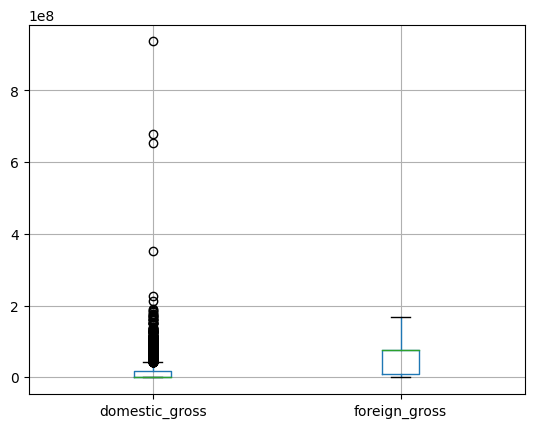

In [ ]:
#now we plot the boxplot now that the outliers have been removed
numeric_columns = ['domestic_gross', 'foreign_gross']
filtered_bom_movies_gross.boxplot(column = numeric_columns)

IMDB title basics info

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

Load the ratings of the data

In [ ]:
imdb_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')

Data Exploration

I now familiarise myself with the data

In [ ]:
#first check out the first five rows of my data
imdb_title_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
#check out the last five rows of the data
imdb_title_ratings.tail(5)

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [ ]:
#check out the number of rows and columns of our data
imdb_title_ratings.shape

(73856, 3)

From the above observation we can see that we have a total of 73856nrows and 3 columns.

In [ ]:
#check out a preview of the sample data
imdb_title_ratings.sample(5)

,tconst,averagerating,numvotes
55577,tt3364066,4.2,22
60873,tt1945148,8.2,19
58714,tt3289536,6.7,15
62467,tt2238837,7.2,1192
12692,tt2374418,6.3,7


In [ ]:
#check the overview of the data
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


From the observation made above we can see that we have 73856 entries with the columns tconst, averagerating,numvotes do not contain any missing values as they are all equal. We also observe that the data type of the averagerating is float type and numvotes is an int type.

In [ ]:
#check for a statistical summary of our data
imdb_title_ratings.describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Data Preprocessing and Claeaning

In [ ]:
#check and confirm that our data indeed has no missing values
#assign the variable missing_values a variable called sum_of_missing_values
sum_of_missing_values = imdb_title_ratings.isna().sum()
sum_of_missing_values

tconst           0
averagerating    0
numvotes         0
dtype: int64

As we can observe from the above ratings data we can confirm that indeed there are no missing values

Check out for any duplicates

In [ ]:
#check and confirm our data for any duplicates which we can sum up
#assign the variable duplicate_values a variable called sum_of_duplicate_values
sum_of_duplicate_values = imdb_title_ratings.duplicated().sum()
sum_of_duplicate_values

0

Check for any unwanted observations

In [ ]:
#replacing "," for the numeric columns that may contain commas which may be read as strings and yet they are  not
#therefore, we check for these commas and replace them
imdb_title_ratings['averagerating'].replace(",", "", inplace=True, regex=True)
imdb_title_ratings['numvotes'].replace(",", "", inplace=True, regex=True)

Check out for any Outliers

The data that we have is in numeric form therefore, we have to chec for any extreme data points that nay vary immensely from other points. In order to check out for these outliers we use the boxplot or the Interquartile range.

<Axes: >

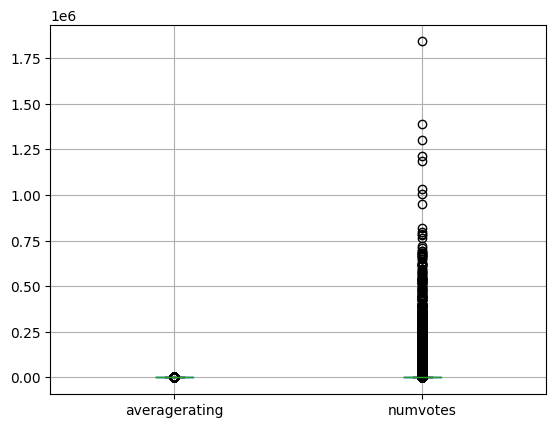

In [ ]:
#visualise the outliers of our data
num_columns = ['averagerating', 'numvotes']
imdb_title_ratings.boxplot(column = num_columns)

In [ ]:
#remove the outliers by using the Interquartile range
def remove_outliers_ratings(imdb_title_ratings, column):
    Q1 = imdb_title_ratings[column].quantile(0.25)
    Q3 = imdb_title_ratings[column].quantile(0.75)
    IQR = Q3-Q1
    imdb_title_ratings = imdb_title_ratings[~((imdb_title_ratings[column]<(Q1-1.5*IQR)) | (imdb_title_ratings[column]>(Q3+1.5*IQR)))]
    return imdb_title_ratings
#my interest is to remove the outliers from the two numerical columns of our data
num_columns = ['averagerating', 'numvotes']
for column in num_columns:
    filtered_imdb_title_ratings = remove_outliers_ratings(imdb_title_ratings,column)


<Axes: >

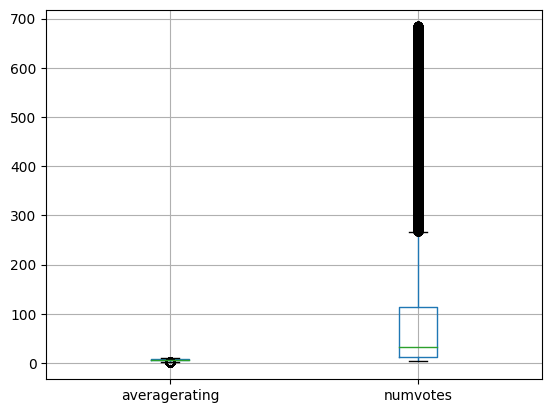

In [ ]:
#finally, we visualise the boxplot to ensure thatw we have actually the outliers
num_columns = ['averagerating', 'numvotes']
filtered_imdb_title_ratings.boxplot(column = num_columns)

Load the data

We import our data for the imdb.title.basics zipped data.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
imdb_title_basics = pd.read_csv('imdb.title.basics.csv.gz')

Data Exploration

I familiarise myself with the data

In [ ]:
#check out the first five rows of our data
imdb_title_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#check out the last five rows of our data
imdb_title_basics.tail(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [ ]:
#check out the number of rows and columnsfor our data
imdb_title_basics.shape

(146144, 6)

From the above results of our data we can clearly see that our data has 146144 number of columns and 6 number of rows respectively.

In [ ]:
#check out and preview a sample of our data
imdb_title_basics.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
58180,tt3393042,"Standardized Lies, Money & Civil Rights: How T...","Standardized Lies, Money & Civil Rights: How T...",2014,74.0,"Documentary,News"
73005,tt4161420,Dari marusan,Dari marusan,2014,103.0,Drama
105586,tt6172788,"My Body, My Rules","My Body, My Rules",2017,71.0,Documentary
61680,tt3560546,Dead Girls,Dead Girls,2014,91.0,"Horror,Thriller"
57787,tt3367744,Drawing Blood,Drawing Blood,2013,88.0,Drama


In [ ]:
#check out for an overview of our data
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


As we can observe from the results above we can see that we have 146144 entries and columns original_title, runtime_minutes and genres have missing values.

In [ ]:
#check for a statistical summary of the data
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


Data Preprocessing and Cleaning

In [ ]:
#we check out the commas and remove "," from the numerical column runtime minutes
#this is done in order for the column not to be read as a string
imdb_title_basics['runtime_minutes'].replace(",", "", inplace=True , regex=True)

In [ ]:
#check out for the missing values using the isna function
#use the variable sum_of_mising_basics to the total of the missing_values
sum_of_missing_basics = imdb_title_basics.isna().sum()
sum_of_missing_basics

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

We can clearly observe that the columns original_title has 21 missing values, runtime_minutes has 31739 missing values and genres has 5408 missing values.

In [ ]:
# checking for percentage of each missing value in relation to the total data available
total_data = imdb_title_basics.shape[0]
# percentage missing value for each column is calculated by dividing sum of each column by len of the whole data
percentage_imdb_title_missing_basics = sum_of_missing_basics/total_data *100
#creating a dataframe with the above info and assign it missing_values_df
missing_basics_df =pd.DataFrame({
      'missing values':sum_of_missing_basics,
      'percentage missing values':percentage_imdb_title_missing_basics
})
missing_basics_df

,missing values,percentage missing values
tconst,0,0.000000
primary_title,0,0.000000
original_title,21,0.014369
start_year,0,0.000000
runtime_minutes,31739,21.717621
genres,5408,3.700460


Observation

As we can see original_title has 0.014% of its data missing, runtime_minutes has 21.71% of its data missing and genres has a 3.7% of its data missing.

Assumptions from the data

Based on the research done on movies produced over the years, they have different titles in different countries and languages. This allows the audience to resonate with the movie depending on the country they live in. In this case my assumption is that original title that has missing has the same title in different countries, therefore, original title is the same as the primary title. Given the small percentage of its missing values, this will not have a susbstansive effect on the analysis done.

Moreover, runtime_minutes represents the length or the duration of a partcular movie. The column has a small 21.71 % of missing values in the whole data. I can therfore,replace it with average duration of a movie.

genres are stylistic categories that organize a movie based on a certain criteria and depends on the audience targeted deoending on the different age groups as well. The genre will be where most of the content of the movie is. My assumption is that the characteristics of the movies with missing values cannot be be placed in a specific category. In this case I will replace the blanks with "nongenre"

In [ ]:
#we will replace the data and use the fillna function to fill the missing values
imdb_title_basics['original_title'].fillna(imdb_title_basics['primary_title'], inplace=True)
imdb_title_basics['runtime_minutes'].fillna(imdb_title_basics['runtime_minutes'].mean(), inplace=True)
imdb_title_basics['genres'].replace(np.nan, 'non-genre', inplace=True, regex=False)

#we can check again that indeed we have removed all the missing values
sum_of_missing_values = imdb_title_basics.isna().sum()
sum_of_missing_values

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

As we can see there are no missing values from the above results

Check for Duplicates

In [ ]:
#check out for duplicates usign the function duplicate()
#we can sum the duplicates using the variable sum_of_duplicate_values
#sum the duplicates using the sum() function
sum_of_duplicate_values = imdb_title_basics.duplicated().sum()
sum_of_duplicate_values

0

As we can observe the above data has no duplicated values.

Check for Outliers

As we can see from the data that we have, we have columns that have numerical values such as the start year and the runtimes_minutes. For these columns we can look for outliers whcih are extreme data points. Wecan visually use the boxplot or the Interquatile range function to check for the outliers.

<Axes: >

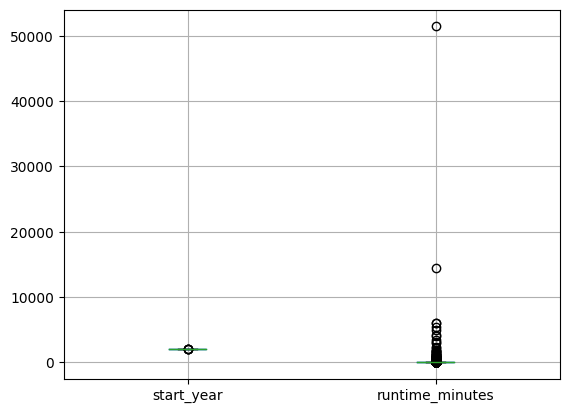

In [ ]:
#we scan use the boxplot to visualize outliers
nums_column = ['start_year', 'runtime_minutes']
imdb_title_basics.boxplot(column = nums_column)

We can clearly observe that from the above results the imdb_title_basics does have extreme data points.

In [ ]:
#remove the outliers using the Interquartile range
#we will only focus on removing the runtime_minutes column
def remove_outliers_basics(imdb_title_basics, column):
    Q1 = imdb_title_basics[column].quantile(0.25)
    Q3 = imdb_title_basics[column].quantile(0.75)
    IQR = Q3-Q1
    imdb_title_basics = imdb_title_basics[~((imdb_title_basics[column]<(Q1-1.5*IQR)) | (imdb_title_basics[column]>(Q3+1.5*IQR)))]
    return imdb_title_basics
#my interest is to remove the outliers from the two numerical columns of our data
num_columns = ['start_year', 'runtime_minutes']
for column in num_columns:
    filtered_imdb_title_basics = remove_outliers_basics(imdb_title_basics,column)

<Axes: >

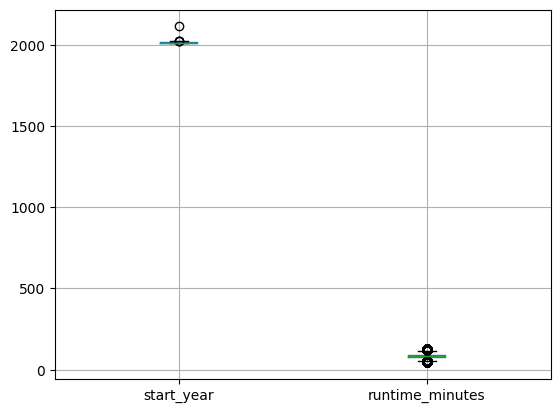

In [ ]:
filtered_imdb_title_basics.boxplot(column = num_columns)

Now all the outliers have been removed based on the results from above

Merge the data

In [ ]:
#Merging filtered_imdb_title_ratings & filtered_imdb_title_basics on column tconst
#I then assign the variable first_merge
first_merge = pd.merge(filtered_imdb_title_basics, filtered_imdb_title_ratings, on='tconst')
first_merge.iloc[2000]
#first_merge.iloc[:,[5,7]]
#first_merge_sorted = first_merge.sort_values(by='numvotes', ascending=False)
#first_merge_sorted.iloc[:,[3,7]]

tconst                               tt1479361
primary_title      Shiniyuku tsuma tono tabiji
original_title     Shiniyuku tsuma tono tabiji
start_year                                2011
runtime_minutes                          113.0
genres                                   Drama
averagerating                              5.6
numvotes                                     7
Name: 2000, dtype: object

Top ten genres doing currently well in the movie industry from the dataset

Create a frequency table for the top ten genres of movies doing currently well

In [ ]:
#create a list with unique genres
unique_genres = first_merge['genres'].unique().tolist()
unique_genres.sort()

#create a dictionary called genres_frequencies
#keys are the unique genres
#values are the number of times the genre appears in the entire dataframe
genres_frequencies = first_merge['genres'].value_counts().to_dict()

In [ ]:
#plotting distribution of the top ten unique genres
#therefore, I first convert the genres_frequency into a data frame and name it genres_df
genres_df = pd.DataFrame(list(genres_frequencies.items()), columns=['Genre', 'Frequency'])
genres_df.head(2)

,Genre,Frequency
0,Drama,9907
1,Documentary,9462


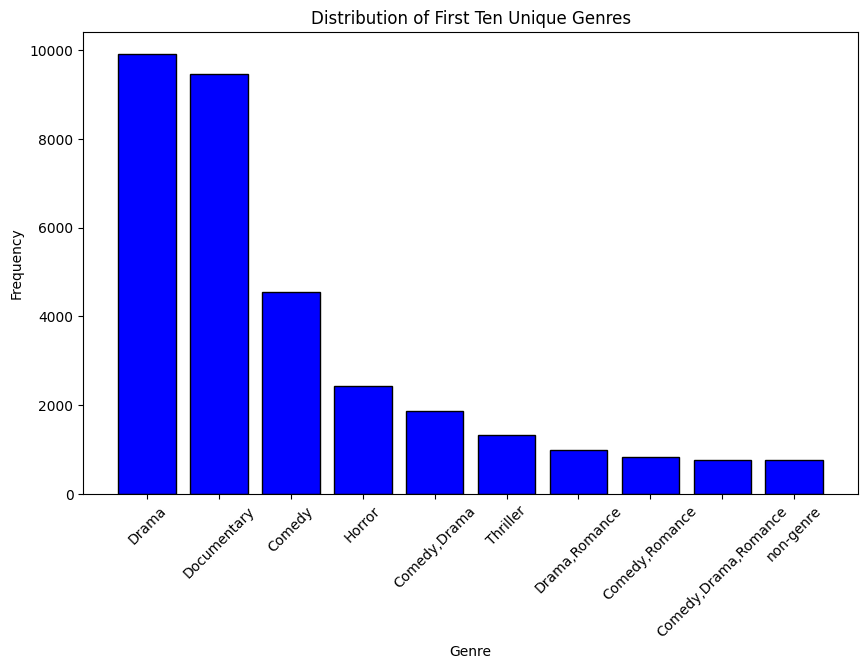

In [ ]:
#pandas are used and arranged in descending order therefore, I select the first ten rows
top_ten_genres_df = genres_df.head(10)
top_ten_genres_df

# i plot the distribution of first ten unique genres
# i later on rotate the x_axis for better readability
# i specify the color of the bars to be blue and the edge to be black
plt.figure(figsize=(10, 6))
bars = plt.bar(top_ten_genres_df['Genre'], top_ten_genres_df['Frequency'], color='blue', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Distribution of First Ten Unique Genres')
plt.xticks(rotation=45)
plt.show()

From the above results on the bar graph plot created we can very well see that Drama Movies are the most produced shows in the movie industry followed by Documentaries and then comedy shows as well. We can as well see that the least produced shows with almost the same frequency is Drama Romance, Comedy Romance and Comedy Drama Romance.

Distribution of the top ten film genres doing well in percentage form

This is going to be done by using a plot pie chart which is best for showcasing the percentages of the genres of movies and how they're doing in the movie industry.

In order to get the percentages of the plot pie chart of the top ten genres of the movies produced I decide to use the autopct = '%1.1 as will be illustrated below.

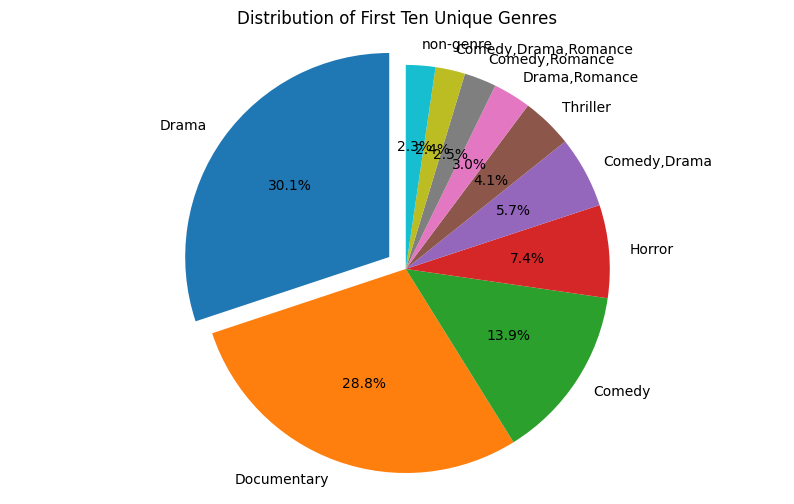

In [ ]:
plt.figure(figsize=(10, 6)) # this represents the size of the pie-chart
plt.pie(top_ten_genres_df['Frequency'], labels=top_ten_genres_df['Genre'], autopct='%1.1f%%', startangle=90, explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plt.title('Distribution of First Ten Unique Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The above pie chart represents the percentages of the top ten movie genres produced in the move industry.

We observe that Drama movie genre is the most produced film in the movie industry as shown in the above pie chart which is represented by 30.1%.

The second most produced shows in the movie industry is Documentary represented by 28.8% and the third being Comedy represented by 13.9%

Movies like comedy, drama, romance are ranked in the 9th position as they are the least produced movies in the movie industry.

Therefore, I can make the conclusion that movie producers like producing single genres of movies other than mixing them up.

Checking the budget trend for movies by usisng the annual gross income trend and the foreign gross income trend set

In order to get the gross income both in the domestic and foreign markets I group the filtered movies gross dataframe by year then get the sum of each market earned each year. Then I assign it a variable called annual income. I rest the index so as to include the year column into the dataframe.

In [ ]:
annual_income = filtered_bom_movies_gross.groupby(filtered_bom_movies_gross['year']).sum().reset_index()
annual_income.head(5)

<ipython-input-118-0dfc0a6d3c8c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_income = filtered_bom_movies_gross.groupby(filtered_bom_movies_gross['year']).sum().reset_index()


,year,domestic_gross,foreign_gross
0,2010,5.398829e+09,6.949077e+09
1,2011,6.178488e+09,1.531120e+10
2,2012,5.344706e+09,1.686641e+10
3,2013,5.204472e+09,1.669905e+10
4,2014,4.954035e+09,1.739383e+10


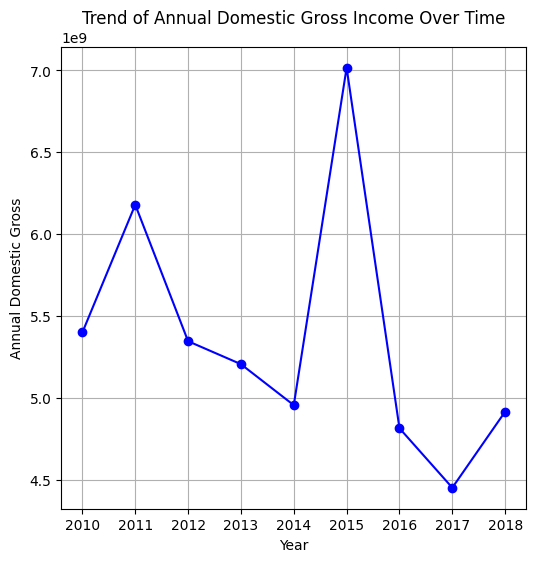

In [ ]:
# Now I weant to create a line plot for the domestic gross over time and will be illustrated below
plt.figure(figsize=(6, 6))
plt.plot(annual_income['year'], annual_income['domestic_gross'], marker='o', linestyle='-', color ='blue')
plt.xlabel('Year')
plt.ylabel('Annual Domestic Gross')
plt.title('Trend of Annual Domestic Gross Income Over Time')
plt.grid(True)
plt.show()

From the line plot above we can carefully observe that the annual domestic income increased from 2010 to 2011.

We can also see that from 2011 to 2014 the domestic gross started decreasing.

There was an increase in the domestic gross from 2014 to 2015 then the gross started declining from 2015 to 2016.

The domestic gross continued to decline from 2016 to 2017 then an increase was observed from 2017 to 2018.



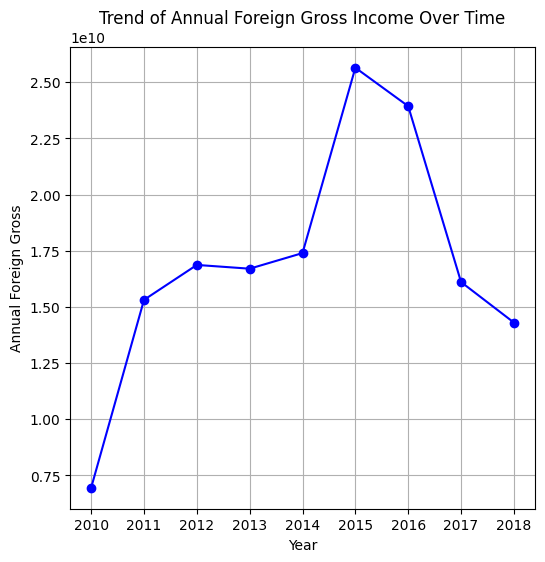

In [ ]:
# Now I weant to create a line plot for the foreign gross over time and will be illustrated below
plt.figure(figsize=(6, 6))
plt.plot(annual_income['year'], annual_income['foreign_gross'], marker='o', linestyle='-', color ='blue')
plt.xlabel('Year')
plt.ylabel('Annual Foreign Gross')
plt.title('Trend of Annual Foreign Gross Income Over Time')
plt.grid(True)
plt.show()

As we can see from the line plot above for the foreign gross there was an increase in the foreign gross from 2010 to 2012.

From 2012 to 2014 the foreign gross income started to decline.

Additionally, from 2014 to 2015 the foreign gross increased again which showed a positive outcome.

From 2015 all through 2018 the foreign gross income declined drastically.

Conclusion

As we can see from the above Data Analysis we have gotten the chance to analyse movies produced in the industry, income used, their ratings and the genres mostly produced.

From the observation made based on the analysis done we have seen that Drama movies are the most produced movies in the movies industry with a percentage of 30.1%.

Another observation made is that Documentary and Comedy movies are the second and third most produced films in different countries respectively with 28.8% and 13.9% percentage.

The domestic gross and foreign gross income chnage over time as they increase and decrease over time hence they are not consistent.

From a business perspective, I would urge the Microsoft shareholders to produce movies more in the Drama genres, Documentary or Comedy as they are the top three most produced movies.

I advise this because if I was to count the total percentage that these three genres contribute to the movie industry it amounts to a total of 72.8% which is a positive outcome.

In conclusion, Microsoft should think of targeting both domestic and foreign markets as thye are both competitive moreover, assessing the risk it may bring to the business.